In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statistics
sns.set_style('whitegrid', {'axes.grid' : False})
sns.set_theme(style="whitegrid", rc={"xtick.bottom" : False, "ytick.left" : False})
plt.figure(dpi=1200)
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy.stats import linregress
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test

<Figure size 7680x5760 with 0 Axes>

## Basic algorythm to calculate the normalized FRET efficiencys, based on the average FRET efficiency values of the measurements with wild type podocin on that day

In [29]:
figdata = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='FRET EC-signed  - podocin types')
display(figdata)

,Mutation,FRET,Repeat,Normmean
0,ypet cherry,0.298867,A,0.925439
1,ypet cherry,0.256374,A,0.793860
2,ypet cherry,0.277620,A,0.859649
3,podocin WT,0.286119,A,0.885965
4,podocin WT,0.341360,A,1.057018
...,...,...,...,...
94,ypet cherry,0.203435,E,0.754902
95,ypet cherry,0.243065,E,0.901961
96,podocin WT,0.250991,E,0.931373
97,podocin WT,0.270806,E,1.004902


In [71]:
refdata = []
normmean = []
for iterat in list(dict.fromkeys(figdata['Repeat'])): # Divising the data by the day the measurement was taken
    ref = (figdata['Mutation'] == 'podocin WT') & (figdata['Repeat'] == iterat) # The reference values are the measurements taken with the wild type podocin on that specific day
    data = figdata[ref==True].index.tolist() # Gaining the index of the sought measurement
    refer = []
    for ind in data:
        reference = figdata.at[ind, figdata.columns[1]] # Getting the FRET values with the help of the index
        refer.append(reference)     
    refdata.append([iterat, statistics.mean(refer)]) # Calculating the mean of the podocin values
for iterat, mean_value in refdata:
    for position in figdata.index.to_list():
        iteration = figdata.loc[position, figdata.columns[2]]
        if iteration == iterat:
            normmean.append(figdata.loc[position,figdata.columns[1]]/mean_value)
figdata['Normmean_check'] = normmean
display(figdata)

,Mutation,FRET,Repeat,Normmean,Normmean_check
0,ypet cherry,0.298867,A,0.925439,0.925439
1,ypet cherry,0.256374,A,0.793860,0.793860
2,ypet cherry,0.277620,A,0.859649,0.859649
3,podocin WT,0.286119,A,0.885965,0.885965
4,podocin WT,0.341360,A,1.057018,1.057018
...,...,...,...,...,...
94,ypet cherry,0.203435,E,0.754902,0.754902
95,ypet cherry,0.243065,E,0.901961,0.901961
96,podocin WT,0.250991,E,0.931373,0.931373
97,podocin WT,0.270806,E,1.004902,1.004902


# Codes for the FRET efficiency figures

### Effect of podocin on the nephrin-nephrin distance

In [16]:
podocin_table = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='FRET nephrin-podocin', names = ['Mutation', 'Raw FRET', 'Iteration', 'Normalized', 'IC/EC'])
display(podocin_table)

,Mutation,Raw FRET,Iteration,Normalized,IC/EC
0,nephrin,0.039454,1,0.356167,IC
1,nephrin,0.021244,1,0.191778,IC
2,nephrin,0.039454,1,0.356167,IC
3,podocin,0.112291,1,1.013695,IC
4,podocin,0.103187,1,0.931509,IC
...,...,...,...,...,...
79,nephrin,0.203435,8,0.754902,EC
80,nephrin,0.243065,8,0.901961,EC
81,podocin,0.250991,8,0.931373,EC
82,podocin,0.270806,8,1.004902,EC


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


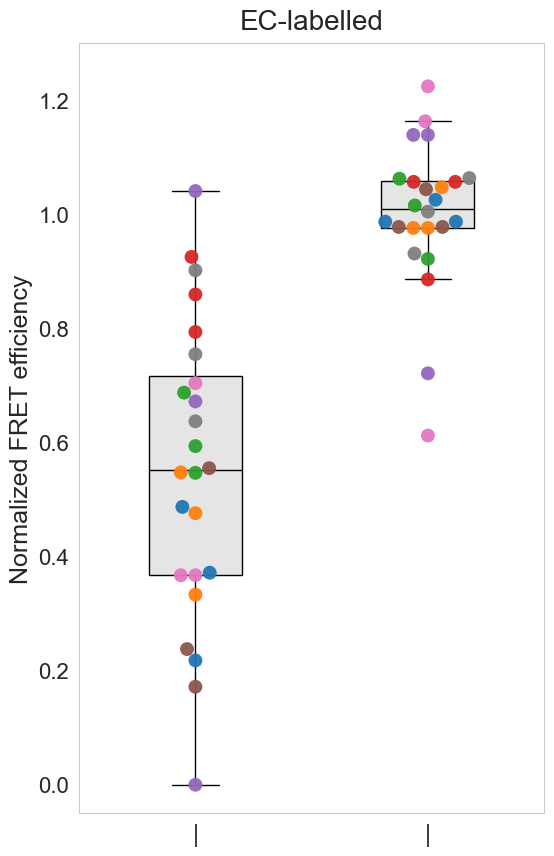

In [254]:
# Initialize Figure and Axes object
fig, ax_fig = plt.subplots(figsize=(6,10))
plot = sns.boxplot(x='Mutation', 
                    y='Normalized',
                    data=podocin_table[podocin_table["IC/EC"]=="EC"], 
                    order=["nephrin", "podocin"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=1,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normalized',  
                    hue='Iteration',
                    data=podocin_table[podocin_table["IC/EC"]=="EC"], 
                    order=["nephrin", "podocin"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=8),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_title('EC-labelled', fontsize=20, pad=10)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(2*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 130, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 130, 20)],fontsize=16, rotation=0)
plot.set_ylim(-0.05,1.3)
plt.savefig('Figure_EC_podocin.tif', bbox_inches='tight', dpi=1200)

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


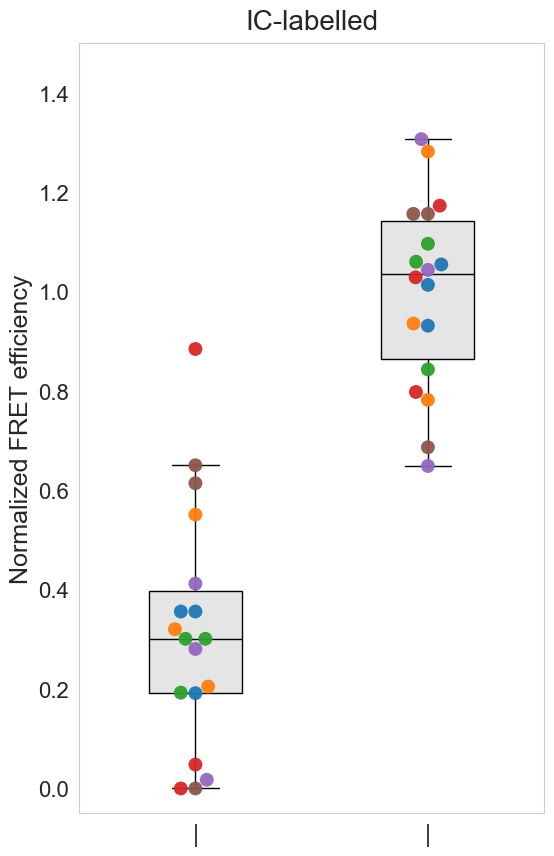

In [252]:
# Initialize Figure and Axes object
fig, ax_fig = plt.subplots(figsize=(6,10))
plot = sns.boxplot(x='Mutation', 
                    y='Normalized',
                    data=podocin_table[podocin_table["IC/EC"]=="IC"], 
                    order=["nephrin", "podocin"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=1,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normalized',  
                    hue='Iteration',
                    data=podocin_table[podocin_table["IC/EC"]=="IC"], 
                    order=["nephrin", "podocin"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=6),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_title('IC-labelled', fontsize=20, pad=10)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(2*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 150, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 150, 20)],fontsize=16, rotation=0)
plot.set_ylim(-0.05,1.5)
plt.savefig('Figure_IC_podocin.tif', bbox_inches='tight', dpi=1200)

### Effect of podocin variants on intracellularly labelled nephrin

In [259]:
IC_podocin_variants = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='FRET IC-signed - podocin types')
display(IC_podocin_variants)

,Mutation,Meres,Iteration,Normmean
0,ypet mruby,0.137725,1,0.884615
1,ypet mruby,0.000000,1,0.000000
2,ypet mruby,0.007485,1,0.048077
3,ypet mruby podocin WT,0.182635,1,1.173077
4,ypet mruby podocin WT,0.124251,1,0.798077
...,...,...,...,...
67,ypet mruby podocin F344LFS,0.076577,3,0.614458
68,ypet mruby podocin F344LFS,0.063063,3,0.506024
69,ypet mruby podocin R229Q,0.063063,3,0.506024
70,ypet mruby podocin R229Q,0.085586,3,0.686747


C:\Users\Violetta\AppData\Local\Temp\ipykernel_26744\1007865801.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  plot = sns.swarmplot(x='Mutation',
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


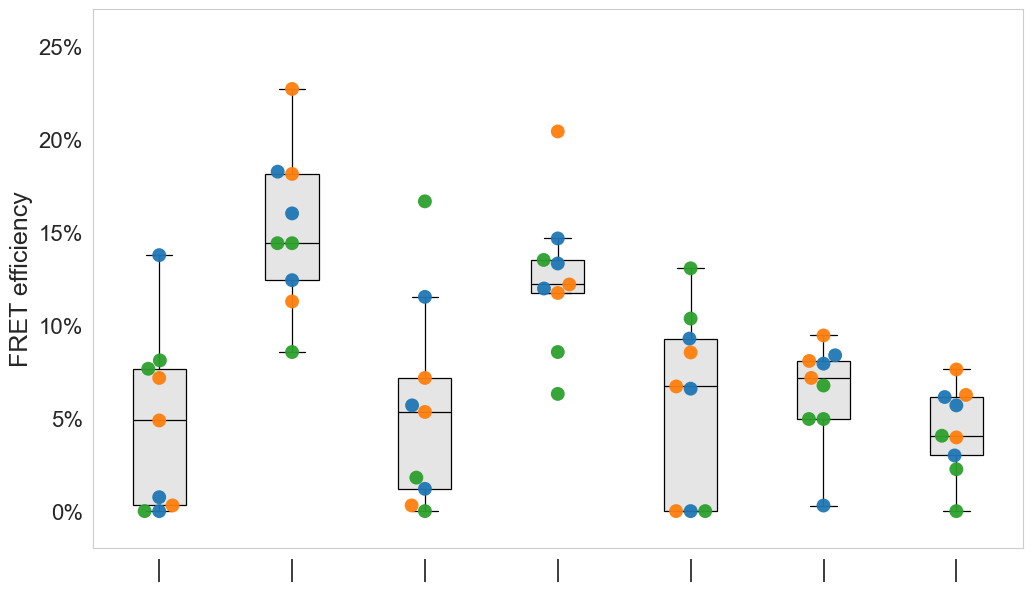

In [306]:
fig, ax_fig = plt.subplots(figsize=(12,7))
plot = sns.boxplot(x='Mutation', 
                    y='Meres',
                    data=IC_podocin_variants, 
                    order=["ypet mruby", "ypet mruby podocin WT", "ypet mruby podocin R138Q", 
                           "ypet mruby podocin R229Q", "ypet mruby podocin A284V", 
                           "ypet mruby podocin FS286", "ypet mruby podocin V290M"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Meres',
                    hue='Iteration',
                    data=IC_podocin_variants, 
                    order=["ypet mruby", "ypet mruby podocin WT", "ypet mruby podocin R138Q", 
                           "ypet mruby podocin R229Q", "ypet mruby podocin A284V", 
                           "ypet mruby podocin FS286", "ypet mruby podocin V290M"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=8),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_ylabel('FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(7*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 30, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 30, 5)],fontsize=16, rotation=0)
plot.set_ylim(-0.02,0.27)
plt.savefig('Figure_IC-labelled_variants_absolute.tif', bbox_inches='tight', dpi=2000)

C:\Users\Violetta\AppData\Local\Temp\ipykernel_26744\3927847773.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  plot = sns.swarmplot(x='Mutation',
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


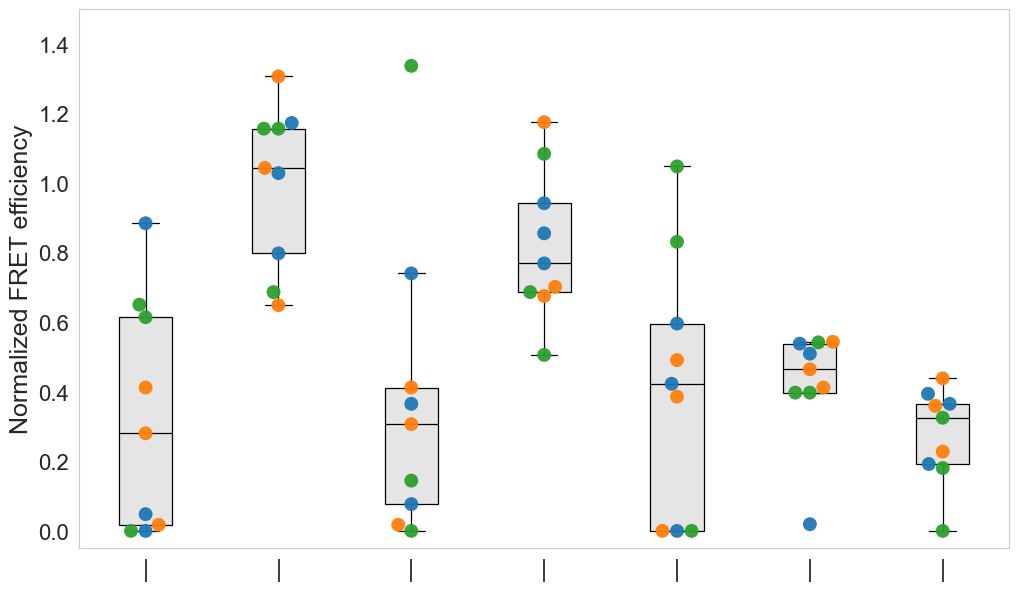

In [308]:
fig, ax_fig = plt.subplots(figsize=(12,7))
plot = sns.boxplot(x='Mutation', 
                    y='Normmean',
                    data=IC_podocin_variants, 
                    order=["ypet mruby", "ypet mruby podocin WT", "ypet mruby podocin R138Q", 
                           "ypet mruby podocin R229Q", "ypet mruby podocin A284V", 
                           "ypet mruby podocin FS286", "ypet mruby podocin V290M"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normmean',
                    hue='Iteration',
                    data=IC_podocin_variants, 
                    order=["ypet mruby", "ypet mruby podocin WT", "ypet mruby podocin R138Q", 
                           "ypet mruby podocin R229Q", "ypet mruby podocin A284V", 
                           "ypet mruby podocin FS286", "ypet mruby podocin V290M"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=8),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(7*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 150, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 150, 20)],fontsize=16, rotation=0)
plot.set_ylim(-0.05,1.5)
plt.savefig('Figure_IC-labelled_variants_normalized.tif', bbox_inches='tight', dpi=2000)

### Effect of podocin variants on extracellularly labelled nephrin

In [316]:
EC_podocin_variants = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='FRET EC-signed  - podocin types')
display(EC_podocin_variants)

,Mutation,FRET,Repeat,Normmean
0,ypet cherry,0.298867,A,0.925439
1,ypet cherry,0.256374,A,0.793860
2,ypet cherry,0.277620,A,0.859649
3,podocin WT,0.286119,A,0.885965
4,podocin WT,0.341360,A,1.057018
...,...,...,...,...
94,ypet cherry,0.203435,E,0.754902
95,ypet cherry,0.243065,E,0.901961
96,podocin WT,0.250991,E,0.931373
97,podocin WT,0.270806,E,1.004902


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


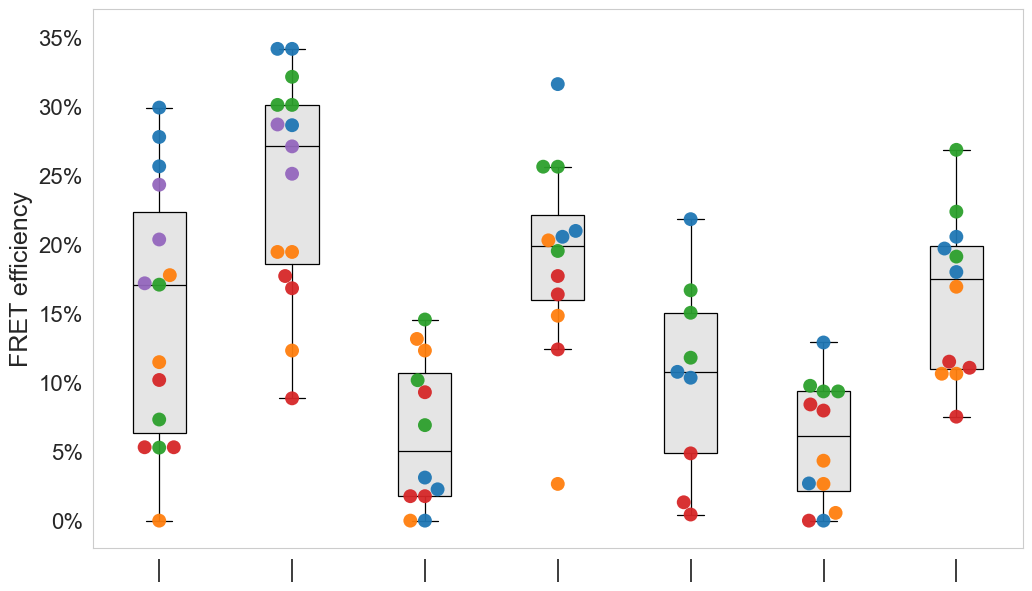

In [328]:
fig, ax_fig = plt.subplots(figsize=(12,7))
plot = sns.boxplot(x='Mutation', 
                    y='FRET',
                    data=EC_podocin_variants, 
                    order=["ypet cherry", "podocin WT", "R138Q", 
                           "R229Q", "A284V", 
                           "R286FS", "V290M"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='FRET',
                    hue='Repeat',
                    data=EC_podocin_variants, 
                    order=["ypet cherry", "podocin WT", "R138Q", 
                           "R229Q", "A284V", 
                           "R286FS", "V290M"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=5),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_ylabel('FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(7*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 37, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 37, 5)],fontsize=16, rotation=0)
plot.set_ylim(-0.02,0.37)
plt.savefig('Figure_EC-labelled_variants_absolute.tif', bbox_inches='tight', dpi=2000)

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


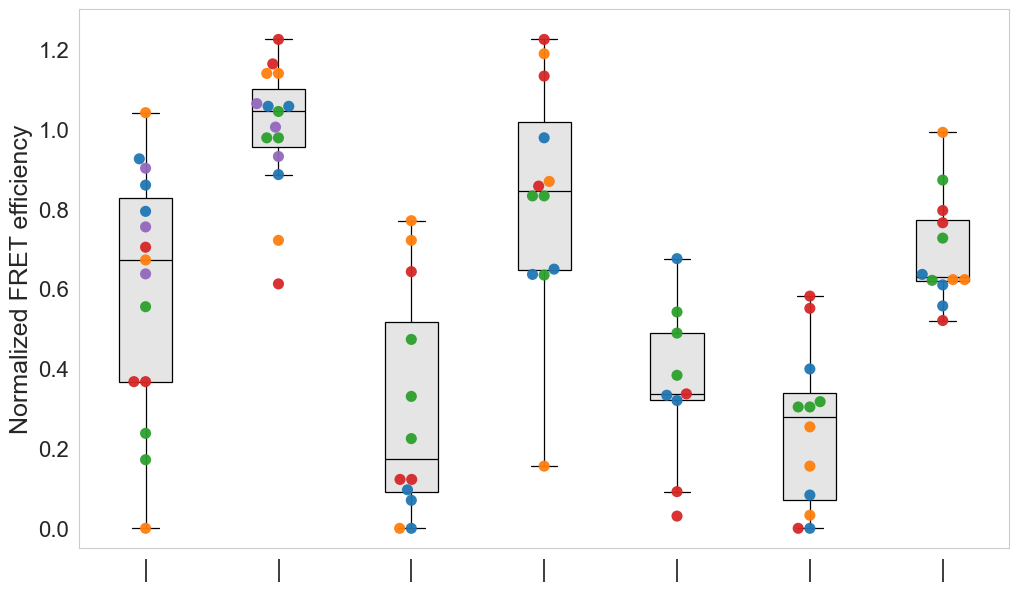

In [342]:
fig, ax_fig = plt.subplots(figsize=(12,7))
plot = sns.boxplot(x='Mutation', 
                    y='Normmean',
                    data=EC_podocin_variants, 
                    order=["ypet cherry", "podocin WT", "R138Q", 
                           "R229Q", "A284V", 
                           "R286FS", "V290M"],
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normmean',
                     hue='Repeat',
                    data=EC_podocin_variants, 
                    order=["ypet cherry", "podocin WT", "R138Q", 
                           "R229Q", "A284V", 
                           "R286FS", "V290M"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=5),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=8)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(7*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 130, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 130, 20)],fontsize=16, rotation=0)
plot.set_ylim(-0.05,1.3)
plt.savefig('Figure_EC-labelled_variants_normalized.tif', bbox_inches='tight', dpi=2000)

### Effect of podocin associations on intracellularly labelled nephrin

In [33]:
IC_podocin_assc = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='IC-labelled FRET in association')
display(IC_podocin_assc)

,Mutation,FRET,Iteration,Normmean
0,nephrin ypet mruby,0.038902,1,0.281771
1,nephrin ypet mruby,0.107551,1,0.779003
2,nephrin ypet mruby,0.093822,1,0.679563
3,podocin WT,0.139588,1,1.011051
4,podocin WT,0.139588,1,1.011051
...,...,...,...,...
128,R229Q-R291W,0.000000,4,0.000000
129,R229Q-R291W,0.061920,4,0.481931
130,R229Q-V290M,0.099071,4,0.771083
131,R229Q-V290M,0.094427,4,0.734938


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


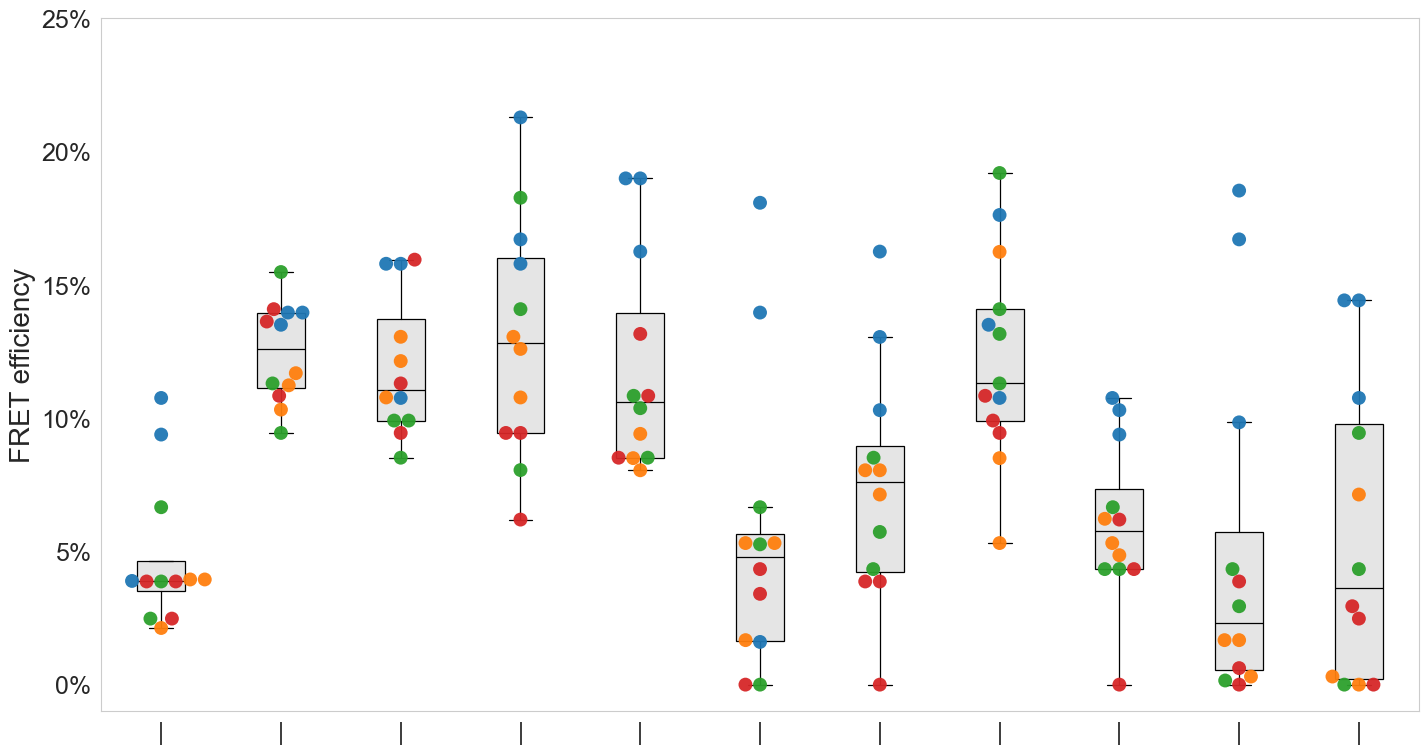

In [68]:
fig, ax_fig = plt.subplots(figsize=(17,9))
plot = sns.boxplot(x='Mutation', 
                    y='FRET',
                    data=IC_podocin_assc, 
                    order=["nephrin ypet mruby", "podocin WT", "WT-R229Q", 
                           "R229Q-R138Q", "R229Q-R229Q", "R229Q-A284V",
                           "R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='FRET',
                    hue='Iteration',
                    data=IC_podocin_assc, 
                    order=["nephrin ypet mruby", "podocin WT", "WT-R229Q", 
                           "R229Q-R138Q", "R229Q-R229Q", "R229Q-A284V",
                           "R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"],
                     legend=False,
                    #color = 'black',
                    palette = sns.color_palette(n_colors=4),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=10)
plot.set_ylabel('FRET efficiency',fontsize=20, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(11*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 30, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 30, 5)],fontsize=18, rotation=0)
plot.set_ylim(-0.01,0.25)
plt.savefig('Figure_IC-labelled_associations_absolute.tif', bbox_inches='tight', dpi=2000)

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


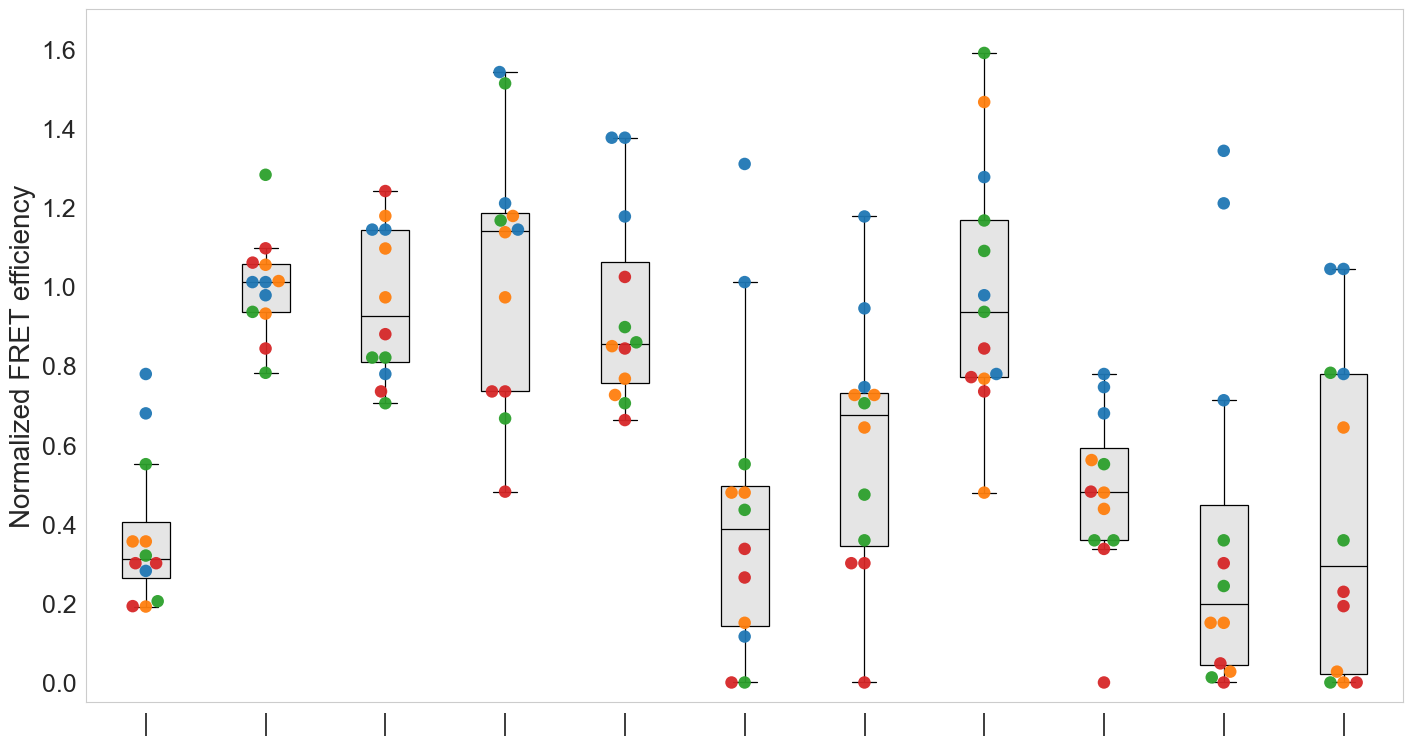

In [70]:
fig, ax_fig = plt.subplots(figsize=(17,9))
plot = sns.boxplot(x='Mutation', 
                    y='Normmean',
                    data=IC_podocin_assc, 
                    order=["nephrin ypet mruby", "podocin WT", "WT-R229Q", 
                           "R229Q-R138Q", "R229Q-R229Q", "R229Q-A284V",
                           "R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"],
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normmean',
                    hue='Iteration',
                    data=IC_podocin_assc, 
                    order=["nephrin ypet mruby", "podocin WT", "WT-R229Q", 
                           "R229Q-R138Q", "R229Q-R229Q", "R229Q-A284V",
                           "R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=4),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('Normalized FRET efficiency',fontsize=20, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(11*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 180, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 180, 20)],fontsize=18, rotation=0)
plot.set_ylim(-0.05,1.7)
plt.savefig('Figure_IC-labelled_associations_normalized.tif', bbox_inches='tight', dpi=2000)

### Effect of podocin associations on extracellularly labelled nephrin

In [4]:
EC_podocin_assc = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='EC-labelled FRET in association')
display(EC_podocin_assc)

,Mutation,FRET,Iteration,Normmean
0,nephrin ypet mCherry,0.041605,1,0.333336
1,nephrin ypet mCherry,0.059435,1,0.476189
2,nephrin ypet mCherry,0.068351,1,0.547623
3,podocin WT,0.121842,1,0.976189
4,podocin WT,0.130758,1,1.047623
...,...,...,...,...
94,R229Q-R291W,0.048780,3,0.410253
95,R229Q-R291W,0.025915,3,0.217952
96,R229Q-V290M,0.094512,3,0.794871
97,R229Q-V290M,0.085366,3,0.717951


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


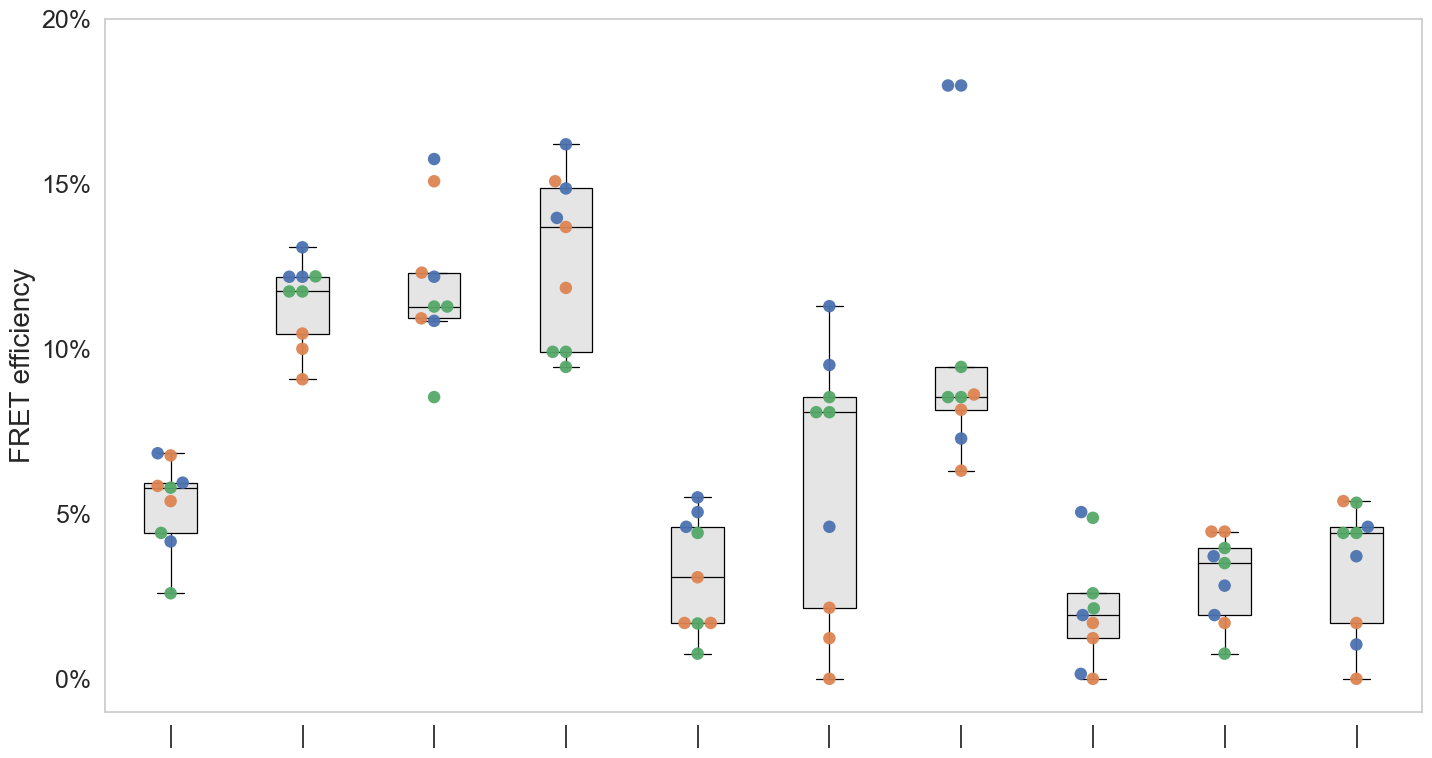

In [19]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(17,9))
plot = sns.boxplot(x='Mutation', 
                    y='FRET',
                    data=EC_podocin_assc, 
                    order=["nephrin ypet mCherry", "podocin WT", "WT-R229Q", 
                           "R229Q-R229Q", "R229Q-A284V","R229Q-R286FS", "R229Q-V290M", 
                           "R229Q-R291W", "R229Q-A297V", "R229Q-F344L"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='FRET',
                    hue='Iteration',
                    data=EC_podocin_assc, 
                    order=["nephrin ypet mCherry", "podocin WT", "WT-R229Q", 
                           "R229Q-R229Q", "R229Q-A284V","R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"],
                     legend=False,
                    #color = 'black',
                    palette = sns.color_palette(n_colors=3),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('FRET efficiency',fontsize=20, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(10*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 25, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 25, 5)],fontsize=18, rotation=0)
plot.set_ylim(-0.01,0.20)
plt.savefig('Figure_EC-labelled_associations_absolute.tif', bbox_inches='tight', dpi=2000)

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


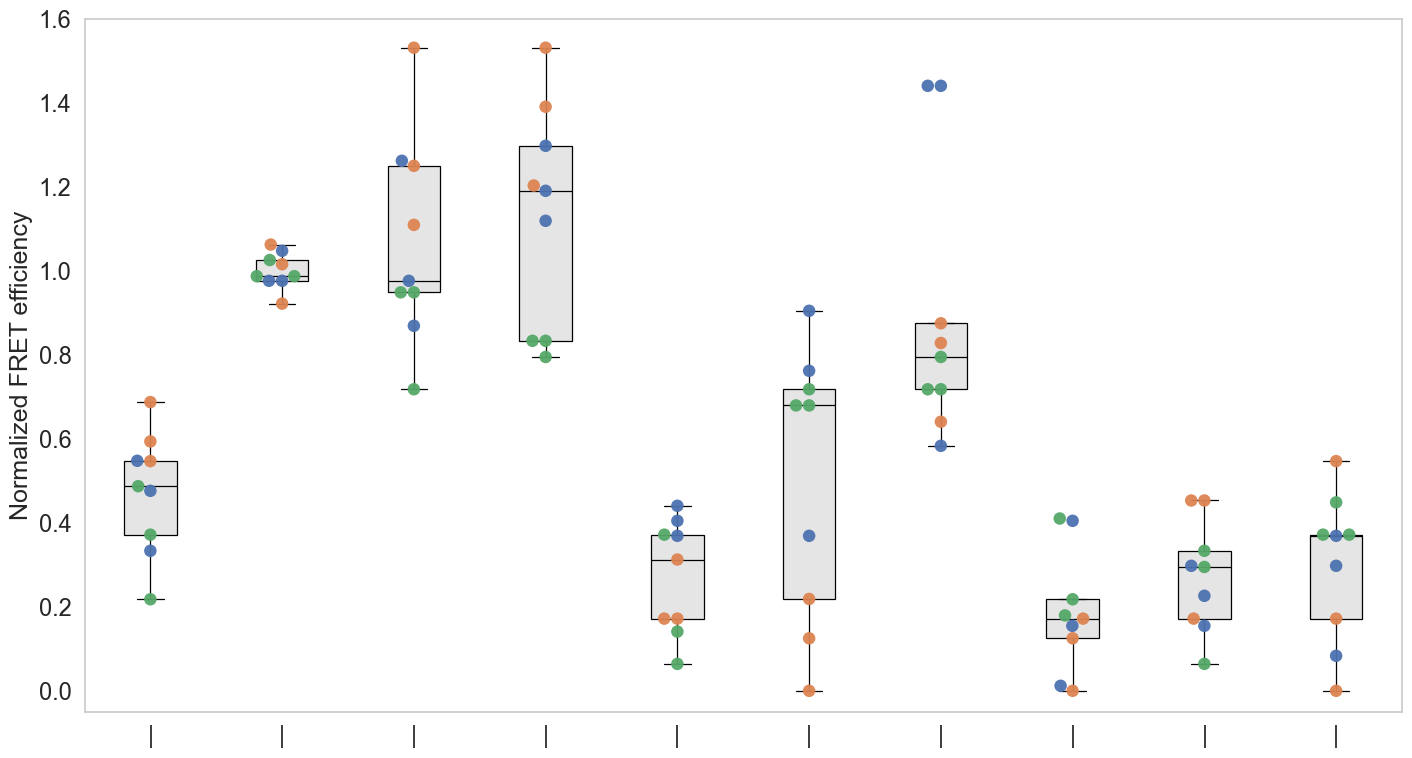

In [25]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(17,9))
plot = sns.boxplot(x='Mutation', 
                    y='Normmean',
                    data=EC_podocin_assc, 
                    order=["nephrin ypet mCherry", "podocin WT", "WT-R229Q",
                           "R229Q-R229Q", "R229Q-A284V","R229Q-R286FS", "R229Q-V290M", 
                           "R229Q-R291W","R229Q-A297V", "R229Q-F344L"],
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Normmean',
                    hue='Iteration',
                    data=EC_podocin_assc, 
                    order=["nephrin ypet mCherry", "podocin WT", "WT-R229Q", 
                           "R229Q-R229Q", "R229Q-A284V","R229Q-R286FS", "R229Q-V290M", "R229Q-R291W",
                          "R229Q-A297V", "R229Q-F344L"],
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=3),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(10*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 170, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 170, 20)],fontsize=17, rotation=0)
plot.set_ylim(-0.05,1.6)
plt.savefig('Figure_EC-labelled_associations_normalized.tif', bbox_inches='tight', dpi=2000)

### Effect of salt burden

In [8]:
neph_neph_salt = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='Salt burden on neph-neph')
display(neph_neph_salt)

,Experiment,Value,Iteration,"Podocin\nwithout - 0,\nwith - 1",Added dietary salt (mM),Mannitol (mM),Normalized values
0,ypet+mcherry nephrin,0.119816,1,0,0,0,0.838711
1,ypet+mcherry nephrin,0.096774,1,0,0,0,0.677417
2,ypet+mcherry nephrin,0.092166,1,0,0,0,0.645161
3,ypet+mcherry nephrin+50mM NaCL,0.046083,1,0,50,0,0.322581
4,ypet+mcherry nephrin+50mM NaCL,0.055300,1,0,50,0,0.387099
...,...,...,...,...,...,...,...
91,ypet+mcherry nephrin PODOCIN+50mM NaCL,0.031963,4,1,50,0,0.279996
92,ypet+mcherry nephrin PODOCIN+50mM NaCL,0.041096,4,1,50,0,0.360001
93,ypet+mcherry nephrin PODOCIN+100mM Mannitol,0.077626,4,1,0,100,0.680003
94,ypet+mcherry nephrin PODOCIN+100mM Mannitol,0.105023,4,1,0,100,0.920001


In [13]:
exp_dict = {'n':['ypet+mcherry nephrin', 'Csak nefrin', 'Csak nefrin', 'Only nephrin'], 'n_25C':['ypet+mcherry nephrin+25mM NaCL', 'Nefrin \n+25mM NaCl', 'Nefrin + 25mM NaCl', 'Nephrin \n+25mM NaCl'], 
            'n_50M':['ypet+mcherry nephrin+50mM Mannitol', 'Nefrin \n+50mM mannitol', 'Nefrin + 50mM mannitol', 'Nephrin \n+50mM mannitol'], 'n_50C':['ypet+mcherry nephrin+50mM NaCL', 'Nefrin \n+50mM NaCl', 'Nefrin + 50mM NaCl', 'Nephrin \n+50mM NaCl'], 
            'n_100M':['ypet+mcherry nephrin+100mM Mannitol', 'Nefrin \n+100mM mannitol', 'Nefrin + 100mM mannitol', 'Nephrin \n+100mM mannitol'], 'p':['ypet+mcherry nephrin PODOCIN', 'Podocin', 'Podocin', 'Podocin'], 
            'p_25C':['ypet+mcherry nephrin PODOCIN+25mM NaCL', 'Podocin \n+25mM NaCl', 'Podocin + 25mM NaCl', 'Podocin \n+25mM NaCl'], 'p_50M':['ypet+mcherry nephrin PODOCIN+50mM Mannitol', 'Podocin \n+50mM mannitol', 'Podocin + 50mM mannitol', 'Podocin \n+50mM mannitol'], 
            'p_50C':['ypet+mcherry nephrin PODOCIN+50mM NaCL', 'Podocin \n+50mM NaCl', 'Podocin + 50mM NaCl', 'Podocin \n+50mM NaCl'], 'p_100M':['ypet+mcherry nephrin PODOCIN+100mM Mannitol', 'Podocin \n+100mM mannitol', 'Podocin + 100mM mannitol', 'Podocin \n+100mM mannitol']}
ex_order = ['n', 'n_25C', 'n_50M', 'n_50C', 'n_100M', 
            'p', 'p_25C', 'p_50M', 'p_50C', 'p_100M']
plot_order = [exp_dict[name][0] for name in ex_order]

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


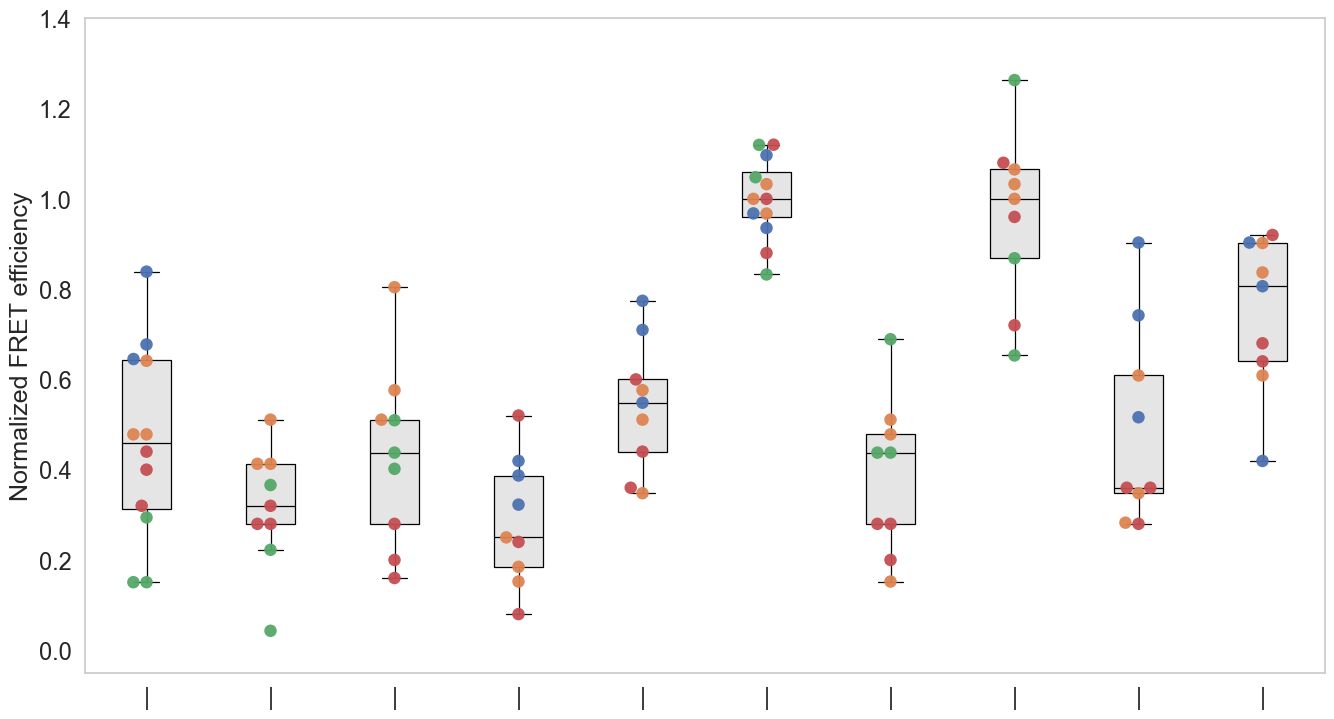

In [33]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(16,8.5))
plot = sns.boxplot(x='Experiment', 
                    y='Normalized values',
                    data=neph_neph_salt, 
                    order=plot_order,
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Experiment', 
                    y='Normalized values',
                    hue='Iteration',
                    data=neph_neph_salt, 
                    order=plot_order,
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=4),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('Normalized FRET efficiency',fontsize=18, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(10*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 150, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 150, 20)],fontsize=17, rotation=0)
plot.set_ylim(-0.05,1.4)
plt.savefig('Figure_salt_effect_on_nephrin_nephrin.tif', bbox_inches='tight', dpi=2000)

In [41]:
neph_pod_salt = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='Salt burden on neph-pod', names=["Sample", "FRET", "Iteration", "Normmean"])
norm_order = ['podocin egfp nephrin mruby','podocin egfp nephrin mruby 25mM NaCl', 'podocin egfp nephrin mruby 50mM mannitol',
              'podocin egfp nephrin mruby 50mM NaCl', 'podocin egfp nephrin mruby 100mM mannitol']
display(neph_pod_salt)

,Sample,FRET,Iteration,Normmean
0,podocin egfp nephrin mruby,0.136126,1,1.130436
1,podocin egfp nephrin mruby,0.115183,1,0.956518
2,podocin egfp nephrin mruby,0.109948,1,0.913045
3,podocin egfp nephrin mruby 25mM NaCl,0.000000,1,0.000000
4,podocin egfp nephrin mruby 25mM NaCl,0.057592,1,0.478263
5,podocin egfp nephrin mruby 25mM NaCl,0.094241,1,0.782609
6,podocin egfp nephrin mruby 50mM mannitol,0.099476,1,0.826082
7,podocin egfp nephrin mruby 50mM mannitol,0.089005,1,0.739128
8,podocin egfp nephrin mruby 50mM mannitol,0.000000,1,0.000000
9,podocin egfp nephrin mruby 50mM NaCl,0.000000,1,0.000000


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


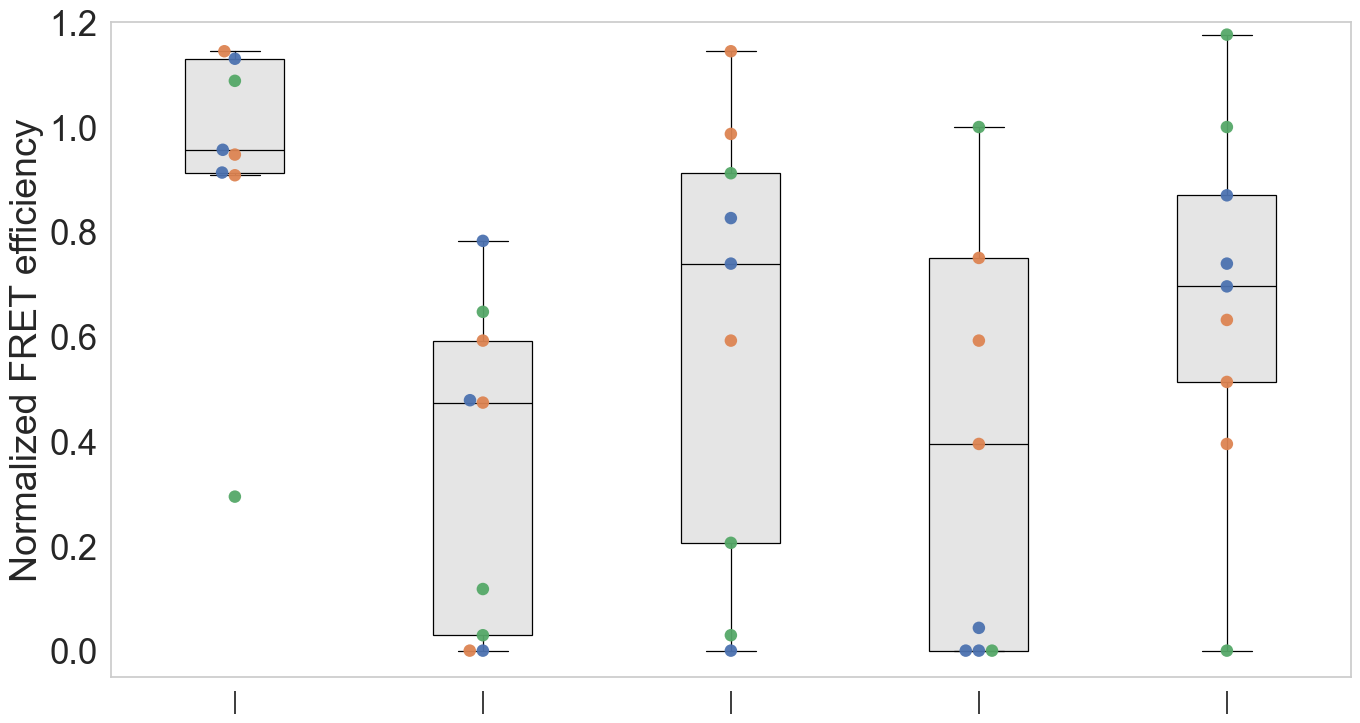

In [73]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(16,8.5))
plot = sns.boxplot(x='Sample', 
                    y='Normmean',
                    data=neph_pod_salt, 
                    order=norm_order,
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Sample', 
                    y='Normmean',
                    hue='Iteration',
                    data=neph_pod_salt, 
                    order=norm_order,
                    legend=False, 
                    #color = 'black',
                    palette = sns.color_palette(n_colors=3),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('Normalized FRET efficiency',fontsize=27, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(5*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 130, 20)])
plot.set_yticklabels(labels=[x/100 for x in range(0, 130, 20)],fontsize=25, rotation=0)
plot.set_ylim(-0.05,1.2)
plt.savefig('Figure_salt_effect_on_nephrin_podocin.tif', bbox_inches='tight', dpi=2000)

### Examination of nephrin binding capacity of R286Tfs and R229Q variants with FRET

In [186]:
R286Tfs_nephrin = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='R286Tfs-nephrin binding')
display(R286Tfs_nephrin)

,Podocin type,FRET value,Iteration
0,podocin_egfp_nephrin_mruby,0.108548,2
1,podocin_egfp_nephrin_mruby,0.181818,2
2,podocin_egfp_nephrin_mruby,0.141113,2
3,podocin_egfp_nephrin_mruby,0.169014,1
4,podocin_egfp_nephrin_mruby,0.023474,1
5,podocin_egfp_nephrin_mruby,0.061033,1
6,R286podocin_egfp_nephrin_mruby,0.000000,2
7,R286podocin_egfp_nephrin_mruby,0.345291,2
8,R286podocin_egfp_nephrin_mruby,0.000000,2
9,R286podocin_egfp_nephrin_mruby,0.000000,1


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


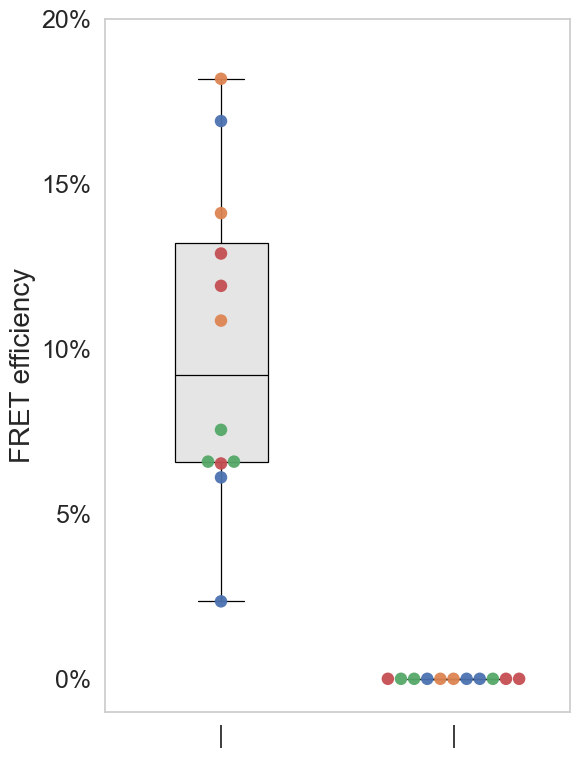

In [210]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(6,9))
plot = sns.boxplot(x='Podocin type', 
                    y='FRET value',
                    data=R286Tfs_nephrin, 
                    order=["podocin_egfp_nephrin_mruby", "R286podocin_egfp_nephrin_mruby"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Podocin type', 
                    y='FRET value',
                     hue='Iteration',
                    data=R286Tfs_nephrin, 
                    order=["podocin_egfp_nephrin_mruby", "R286podocin_egfp_nephrin_mruby"], 
                     legend=False,
                    #color = 'black',
                    palette = sns.color_palette(n_colors=4),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('FRET efficiency',fontsize=20, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(2*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 25, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 25, 5)],fontsize=18, rotation=0)
plot.set_ylim(-0.01,0.20)
plt.savefig('R286Tfs_nephrin_effect.tif', bbox_inches='tight', dpi=2000)

In [188]:
R229Q_wt_nephrin = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='R229Q-neph vs WT-neph binding')
display(R229Q_wt_nephrin)

,Experimental setup,FRET values,Iteration
0,podocin_egfp_nephrin_mruby,0.104334,3
1,podocin_egfp_nephrin_mruby,0.085072,3
2,podocin_egfp_nephrin_mruby,0.099518,3
3,podocin_egfp_nephrin_mruby_HA_podocin,0.012841,3
4,podocin_egfp_nephrin_mruby_HA_podocin,0.003210,3
5,podocin_egfp_nephrin_mruby_HA_podocin,0.027287,3
6,podocin_egfp_nephrin_mruby_HA_R229Q,0.051364,3
7,podocin_egfp_nephrin_mruby_HA_R229Q,0.075441,3
8,podocin_egfp_nephrin_mruby_HA_R229Q,0.056180,3
9,podocin_egfp_nephrin_mruby,0.173913,4


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


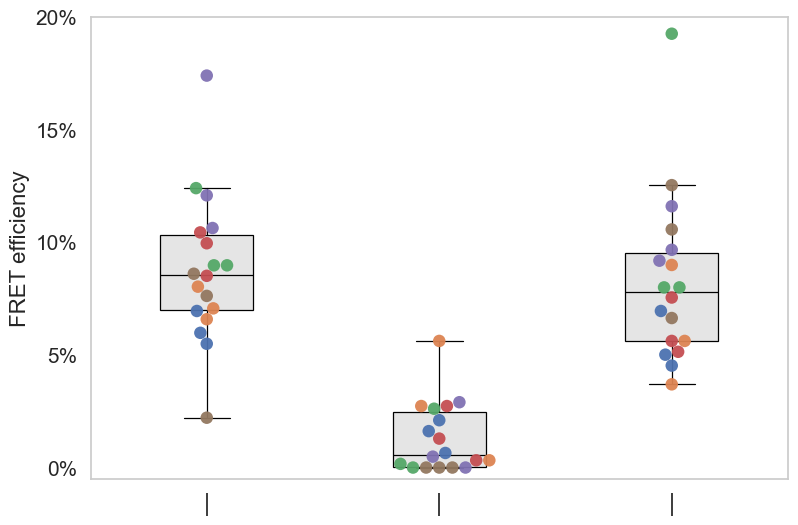

In [232]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(9,6))
plot = sns.boxplot(x='Experimental setup', 
                    y='FRET values',
                    data=R229Q_wt_nephrin, 
                    order=["podocin_egfp_nephrin_mruby", "podocin_egfp_nephrin_mruby_HA_podocin", "podocin_egfp_nephrin_mruby_HA_R229Q"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Experimental setup', 
                    y='FRET values',
                     hue='Iteration',
                    data=R229Q_wt_nephrin, 
                    order=["podocin_egfp_nephrin_mruby", "podocin_egfp_nephrin_mruby_HA_podocin", "podocin_egfp_nephrin_mruby_HA_R229Q"], 
                     legend=False,
                    #color = 'black',
                    palette = sns.color_palette(n_colors=6),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('FRET efficiency',fontsize=16, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(3*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 25, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 25, 5)],fontsize=15, rotation=0)
plot.set_ylim(-0.005,0.20)
plt.savefig('R229Q_wildtype_podocin_nephrin_effect.tif', bbox_inches='tight', dpi=2000)

In [234]:
R229Q_direct_nephrin = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='R229Q direct nephrin binding')
display(R229Q_direct_nephrin)

,Mutation,Values,Iteration
0,WT-egfp_nephrin-mRuby,0.139932,2
1,WT-egfp_nephrin-mRuby,0.109215,2
2,WT-egfp_nephrin-mRuby,0.109215,2
3,R229Q-egfp_nephrin-mRuby,0.053398,2
4,R229Q-egfp_nephrin-mRuby,0.082524,2
5,R229Q-egfp_nephrin-mRuby,0.029126,2
6,WT-egfp_nephrin-mRuby,0.150259,3
7,WT-egfp_nephrin-mRuby,0.186528,3
8,WT-egfp_nephrin-mRuby,0.145078,3
9,R229Q-egfp_nephrin-mRuby,0.046931,3


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


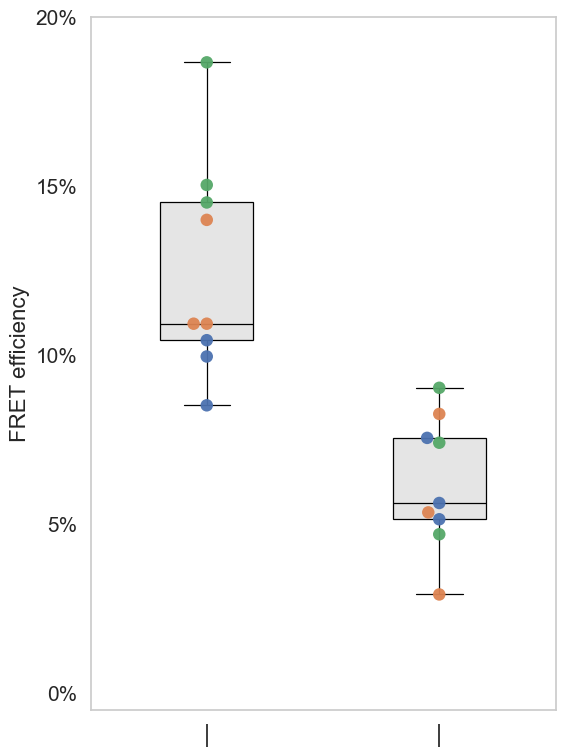

In [250]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(6,9))
plot = sns.boxplot(x='Mutation', 
                    y='Values',
                    data=R229Q_direct_nephrin, 
                    order=["WT-egfp_nephrin-mRuby", "R229Q-egfp_nephrin-mRuby"], 
                   color='black', 
                   saturation=1,
                  width=0.4,
                   showfliers=False,
                  linewidth=0.9,
                  ax=ax_fig)
for patch in plot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))
plot = sns.swarmplot(x='Mutation', 
                    y='Values',
                     hue='Iteration',
                    data=R229Q_direct_nephrin, 
                    order=["WT-egfp_nephrin-mRuby", "R229Q-egfp_nephrin-mRuby"], 
                    legend=False,
                    #color = 'black',
                    palette = sns.color_palette(n_colors=3),
                    marker = 'o',
                    alpha = 0.95,
                    #jitter=0.2,
                    size=9)
plot.set_ylabel('FRET efficiency',fontsize=16, labelpad=4)
plot.set_xlabel('')
plot.set_xticklabels(2*"|", fontsize=17)
plot.set_yticks([x/100 for x in range(0, 25, 5)])
plot.set_yticklabels(labels=["{}%".format(x) for x in range(0, 25, 5)],fontsize=15, rotation=0)
plot.set_ylim(-0.005,0.20)
plt.savefig('R229Q_nephrin_effect.tif', bbox_inches='tight', dpi=2000)

### Podocin-podocin FRET measurements and podocin-nephrin correlation

In [3]:
R229Q_podocin_FRET = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='R229Q Podocin FRET')
WT_podocin_FRET = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='WT Podocin FRET')
display(R229Q_podocin_FRET)
display(WT_podocin_FRET)

,SET,NORM_FRET
0,wt - wt,0.194211
1,wt - wt,0.190526
2,wt - wt,0.193684
3,R229Q - wt,0.325090
4,R229Q - wt,0.314646
5,R229Q - wt,0.341484
6,R229Q - R229Q,0.203161
7,R229Q - R229Q,0.231979
8,R229Q - R229Q,0.207682
9,R229Q - A284V,0.347295


,SET,NORM_FRET
0,wt - wt,0.194211
1,wt - wt,0.190526
2,wt - wt,0.193684
3,wt - R229Q,0.259549
4,wt - R229Q,0.269474
5,wt - R229Q,0.271579
6,wt - A284V,0.048500
7,wt - A284V,0.042500
8,wt - A284V,0.046100
9,wt - V290M,0.052200


C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\AppData\Local\Temp\ipykernel_6540\136147158.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot2.set_xticklabels(11*"|", fontsize=17)


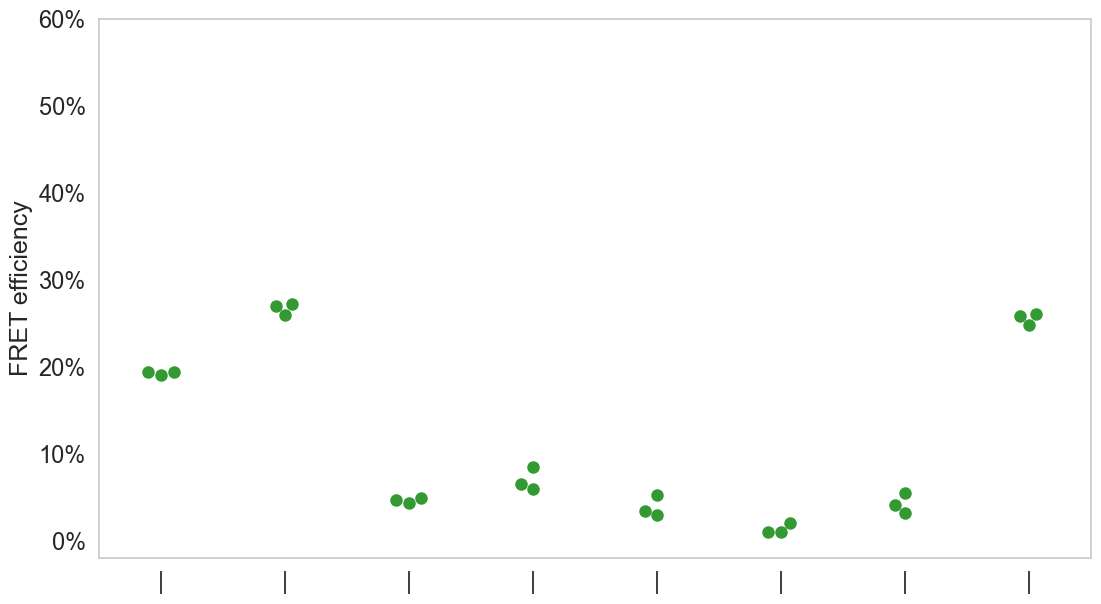

In [86]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(12.8,7))
plot2 = sns.swarmplot(x='SET', 
                    y='NORM_FRET',  
                    data=WT_podocin_FRET, 
                    order= ['wt - wt', 'wt - R229Q', 'wt - A284V', 'wt - R286Tfs', 'wt - V290M', 'wt - R291W', 'wt - A297V', 'wt - F344L*4'],
                    legend=False, 
                    color = 'green',
                    marker = 'o',
                    alpha = 0.8,
                    size=9,
                     ax=ax_fig)
plot2.set_ylabel('FRET efficiency',fontsize=18, labelpad=4)
plot2.set_xlabel('')
plot2.set_xticklabels(11*"|", fontsize=17)
plot2.set_yticks([x/100 for x in range(0, 70, 10)])
plot2.set_yticklabels(labels=["{}%".format(x) for x in range(0, 70, 10)],fontsize=17, rotation=0)
plot2.set_ylim(-0.02,0.6)
plt.savefig('WT_podocin_FRET.tiff', bbox_inches='tight', dpi=2000)

C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Violetta\AppData\Local\Temp\ipykernel_2396\257216456.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot2.set_xticklabels(8*"|", fontsize=17)


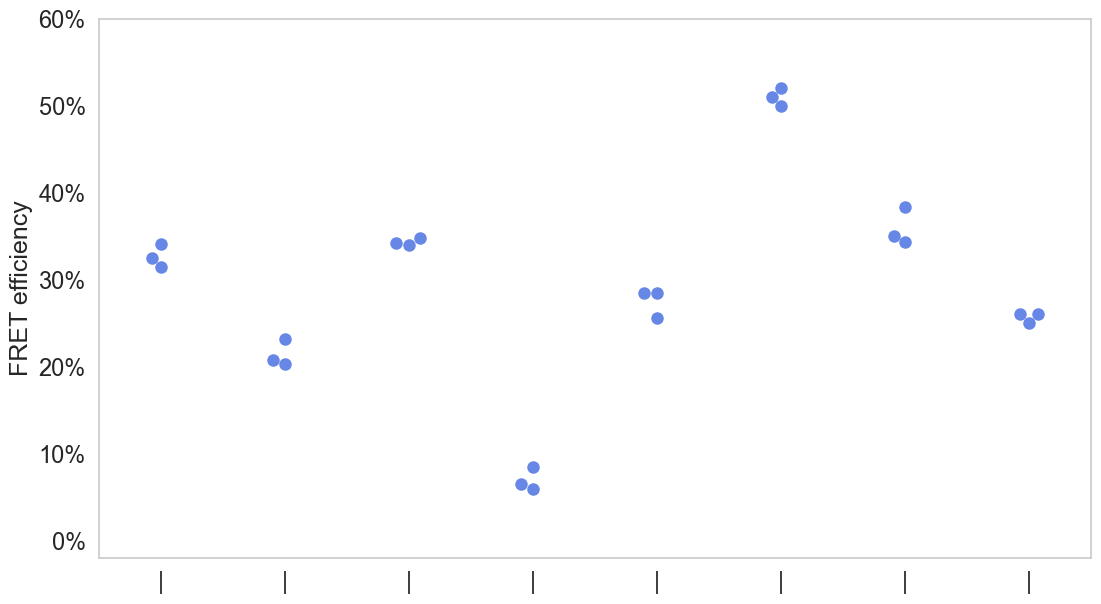

In [9]:
sns.set_style('whitegrid', {'axes.grid' : False})
fig, ax_fig = plt.subplots(figsize=(12.8,7))
plot2 = sns.swarmplot(x='SET', 
                    y='NORM_FRET',  
                    data=R229Q_podocin_FRET, 
                    order= ['R229Q - wt', 'R229Q - R229Q', 'R229Q - A284V', 'R229Q - R286Tfs', 'R229Q - V290M', 'R229Q - R291W', 'R229Q - A297V', 'R229Q - F344L*4'],
                    legend=False, 
                    color = 'royalblue',
                    marker = 'o',
                    alpha = 0.8,
                    size=9,
                     ax=ax_fig)
plot2.set_ylabel('FRET efficiency',fontsize=18, labelpad=4)
plot2.set_xlabel('')
plot2.set_xticklabels(8*"|", fontsize=17)
plot2.set_yticks([x/100 for x in range(0, 70, 10)])
plot2.set_yticklabels(labels=["{}%".format(x) for x in range(0, 70, 10)],fontsize=17, rotation=0)
plot2.set_ylim(-0.02,0.6)
plt.savefig('R229Q_podocin_FRET.tiff', bbox_inches='tight', dpi=2000)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 0.013152663532139529
	b = popt[1] = -1.3492301935718753
pcov= [[6.25348951e-05 3.26806858e-03]
 [3.26806858e-03 1.75690920e-01]]


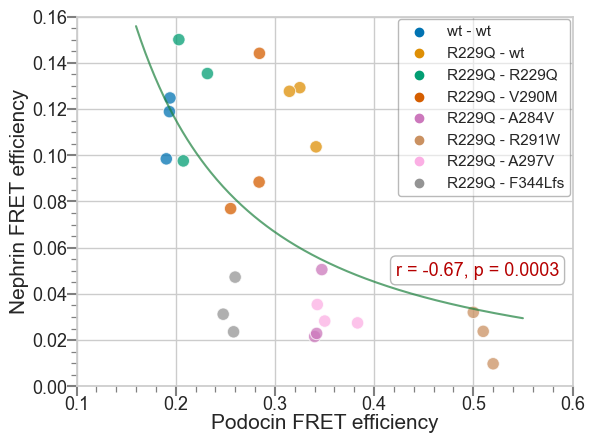

In [80]:
sns.set_theme(style="whitegrid", rc={"xtick.bottom" : True, "ytick.left" : True})
myplot = sns.scatterplot(data=podocin_nephrin_corr, # Data source
                         x='NORM_FRET', # Horizontal axis
                         y='Nephrin_FRET_Av', # Vertical axis
                         hue = "Association",
                         palette = sns.color_palette('colorblind', 8),
                         alpha = 0.75,
                         s= 80) # size and dimension

# Set x-axis label
plt.xlabel('Podocin FRET efficiency', labelpad= 0.0, fontsize=15)
# Set y-axis label
plt.ylabel('Nephrin FRET efficiency', labelpad= 2.0, fontsize=15)

myplot.minorticks_on()

def myExpFunc(x, a, b):
    return a * np.power(x, b)

# Using the myExpFunc, here I fit the podocin-nephrin correlation with podocin as independent variable
newX = np.linspace(0.16, 0.55, num=250)
popt, pcov = curve_fit(myExpFunc, podocin, nephrin, absolute_sigma= False, full_output=False)
plt.plot(newX, myExpFunc(newX, *popt), color="#1d813e", alpha=0.7,)
print("Exponential Fit: y = (a*(x**b))")
print("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))
print("pcov=", pcov)

# Modifying the legend
plt.legend(bbox_to_anchor=(0.995, 0.995), loc='upper right', borderaxespad=0, framealpha=0.55, edgecolor="grey")

# Set the limits for the grid
myplot.set(xlim=(0.1,0.6), ylim=(0,0.16))
myplot.tick_params(axis="both", labelsize=13, pad=-3)
myplot.tick_params(axis="both", which="major", direction='out', length=7.0, width=1.5,labelsize=13, pad=0, color="grey",)
myplot.tick_params(axis="x", which="minor", direction='out', length=4.5, width=0.9, pad=0.8, color="grey", labelsize=10, labelbottom= True)
myplot.tick_params(axis="y", which="minor", direction='out', length=4.5, width=0.9, pad=0.8, color="grey", labelsize=10, labelleft= True)

# Statistics
r, p = stats.pearsonr(np.log10(podocin), np.log10(nephrin))
myplot.text(0.422, 0.048, 'r = {:.2f}, p = {:.2g}'.format(r, p), color="#B50000", fontsize=13, backgroundcolor='white', bbox = dict(facecolor='white', edgecolor='grey', alpha=0.55, boxstyle='round'))
plt.savefig('Podocin_nephrin_correlation.tif', bbox_inches='tight', dpi=2000)

# Kaplan-Meier Survival Curves

In [3]:
Kaplan_Meier_data = pd.read_excel(r'Source_Data_work_file.xlsx', sheet_name='Patients in literature')
display(Kaplan_Meier_data)

,Patient number,Source,"Gender\n(M-male, F-female)",Ethnicity (gnomAD),Ethnicity,1st allele nucleotid change,Amino acid change encoded by the 1st allele,2nd allele nucleotid change,Amino acid change encoded by the 2nd allele,Groups,Age of onset\n(year),ESRD_year,ESRD
0,F12,al-hamed2013,NaN,NaN,Saudi Arabia,c.538G>A,V180M,c.538G>A,V180M,membrane localized,2.0,13.0,0
1,F18,al-hamed2013,NaN,NaN,Saudi Arabia,c.538G>A,V180M,c.538G>A,V180M,membrane localized,5.0,20.0,0
2,F7,al-hamed2013,NaN,NaN,Saudi Arabia,c.538G>A,V180M,c.538G>A,V180M,membrane localized,2.0,3.0,1
3,S24,al-hamed2013,NaN,NaN,Saudi Arabia,c.538G>A,V180M,c.538G>A,V180M,membrane localized,6.0,18.0,0
4,SB,"Berdeli et al, 2007",M,European (Non-Finnish),Turkey,c.413G>A,R138Q,c.413G>A,R138Q,R138Q X R138Q,2.5,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2,Bristol cohort,F,NaN,NaN,NaN,R229Q,NaN,R286Tfs,R229Q X R286Tfs,22.0,28.0,1
119,22128,Nottingham cohort,M,NaN,NaN,NaN,R229Q,NaN,R286Tfs,R229Q X R286Tfs,10.0,11.0,0
120,8675,Nottingham cohort,M,NaN,NaN,NaN,R229Q,NaN,R286Tfs,R229Q X R286Tfs,25.0,42.0,0
121,1,Paris cohort,M,NaN,NaN,NaN,R229Q,NaN,R286Tfs,R229Q X R286Tfs,29.0,32.0,0


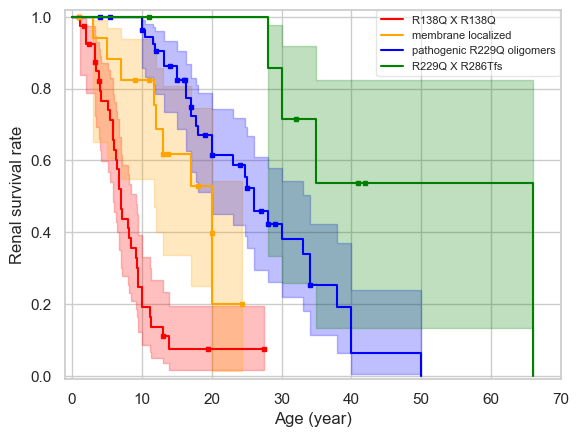

In [26]:
names = Kaplan_Meier_data['Groups'].unique()
age = Kaplan_Meier_data['ESRD_year']
esrd = Kaplan_Meier_data['ESRD']

#ax.clear()

kmf_R138Q = KaplanMeierFitter()
R138Q = Kaplan_Meier_data['Groups'] == names[1]
kmf_R138Q.fit(age[R138Q], esrd[R138Q], label = names[1])
ax = kmf_R138Q.plot(show_censors=True, censor_styles={'ms': 3.5, 'marker': 's','label':'_out_'}, ci_show=True, color="red")

kmf_membrane = KaplanMeierFitter()
membrane = Kaplan_Meier_data['Groups'] == names[0]
kmf_membrane.fit(age[membrane], esrd[membrane], label = 'membrane localized')
ax = kmf_membrane.plot(show_censors=True, censor_styles={'ms': 3.5, 'marker': 's','label':'_out_'}, ax=ax, ci_show=True, color="orange")

kmf_R229Q = KaplanMeierFitter()
R229Q = Kaplan_Meier_data['Groups'] == names[2]
kmf_R229Q.fit(age[R229Q], esrd[R229Q], label = 'pathogenic R229Q oligomers')
ax = kmf_R229Q.plot(show_censors=True, censor_styles={'ms': 3.5, 'marker': 's','label':'_out_'}, ax=ax, ci_show=True, color="blue")

kmf_R286Tfs = KaplanMeierFitter()
R286Tfs = Kaplan_Meier_data['Groups'] == names[3]
kmf_R286Tfs.fit(age[R286Tfs], esrd[R286Tfs], label = names[3])
ax = kmf_R286Tfs.plot(show_censors=True, censor_styles={'ms': 3.5, 'marker': 's','label':'_out_'}, ax=ax, ci_show=True, color="green")

ax.set_xlim([-1, 70])
ax.set_ylim([-0.01, 1.02])
ax.set_ylabel("Renal survival rate", size=12)
ax.set_xlabel("Age (year)", size=12)
plt.legend(bbox_to_anchor=(0.998, 0.998), loc='upper right', borderaxespad=0, framealpha=0.5, fontsize=8)
#plt.legend(loc='upper right')

#ax.get_figure()
ax.get_figure().savefig('kaplan-meier_curve_with_confidence_with_censored_data.tiff', format='tiff', bbox_inches='tight', dpi=2000, )

In [ ]:
results = logrank_test(age[R229Q], age[R138Q], event_observed_A=esrd[R229Q], event_observed_B=esrd[R138Q])

results.print_summary()
print(results.p_value)

In [64]:
results = logrank_test(age[R229Q], age[membrane], event_observed_A=esrd[R229Q], event_observed_B=esrd[membrane])

results.print_summary()
print(results.p_value)        

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.07 0.02      5.36

0.024290916999675033


In [66]:
results = logrank_test(age[R229Q], age[R286Tfs], event_observed_A=esrd[R229Q], event_observed_B=esrd[R286Tfs])

results.print_summary()
print(results.p_value)       

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.21 0.01      6.30

0.012706799770017586
